In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
data = pd.read_csv(r"C:\Users\KeshavG\Desktop\stuffs\IBM\UAEP\Project\Forms\dataset\Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
admission_df = data.drop('Serial No.', axis=1) 
admission_df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [5]:
admission_df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
admission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
admission_df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Visualization

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>,
        <AxesSubplot:title={'center':'University Rating'}>],
       [<AxesSubplot:title={'center':'SOP'}>,
        <AxesSubplot:title={'center':'LOR '}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>,
        <AxesSubplot:>]], dtype=object)

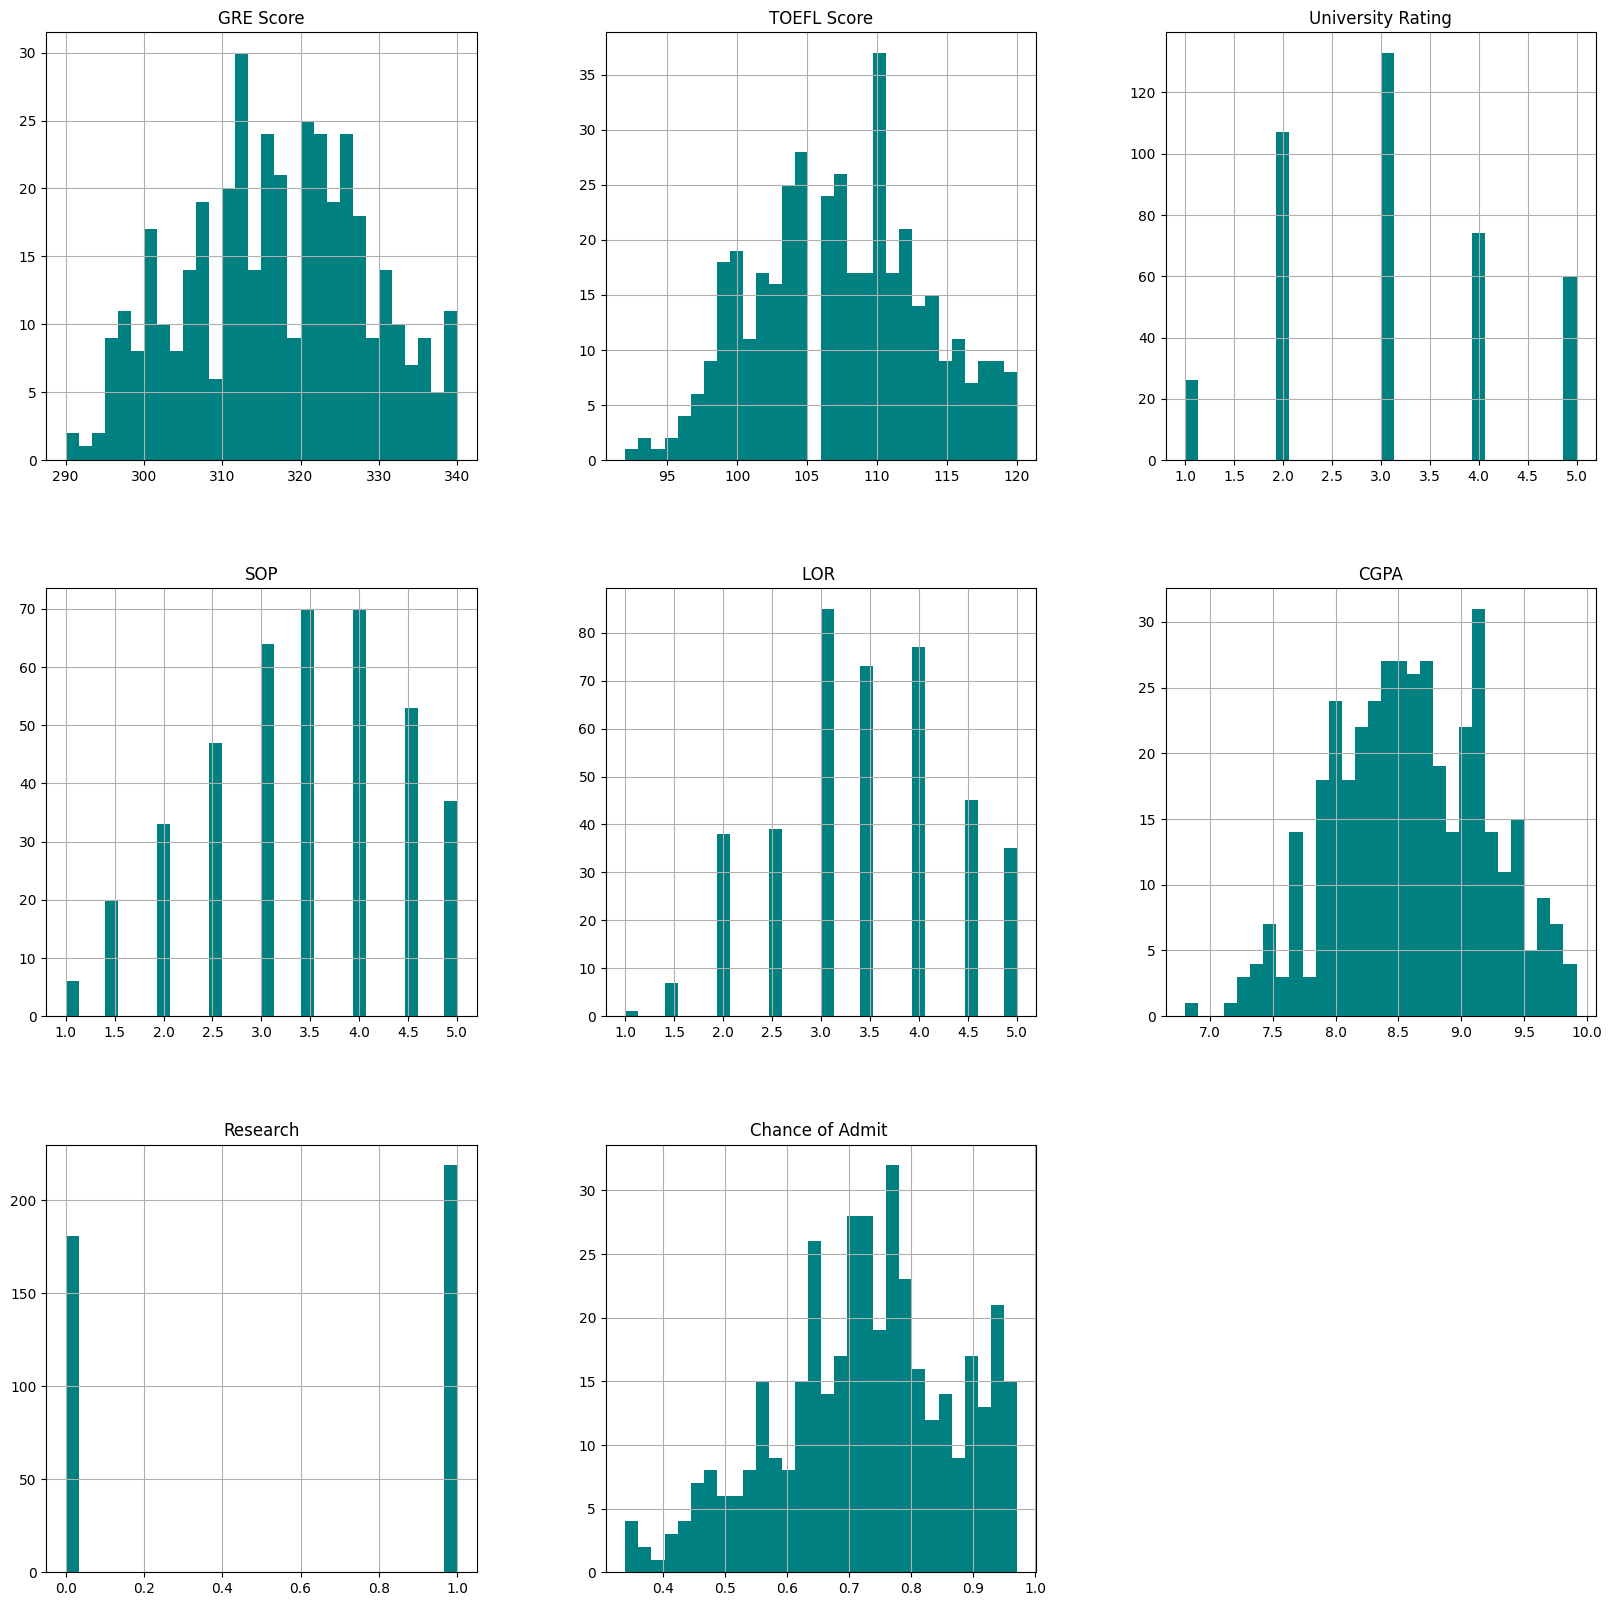

In [8]:
admission_df.hist(bins = 30, figsize = (20,20), color = 'teal')

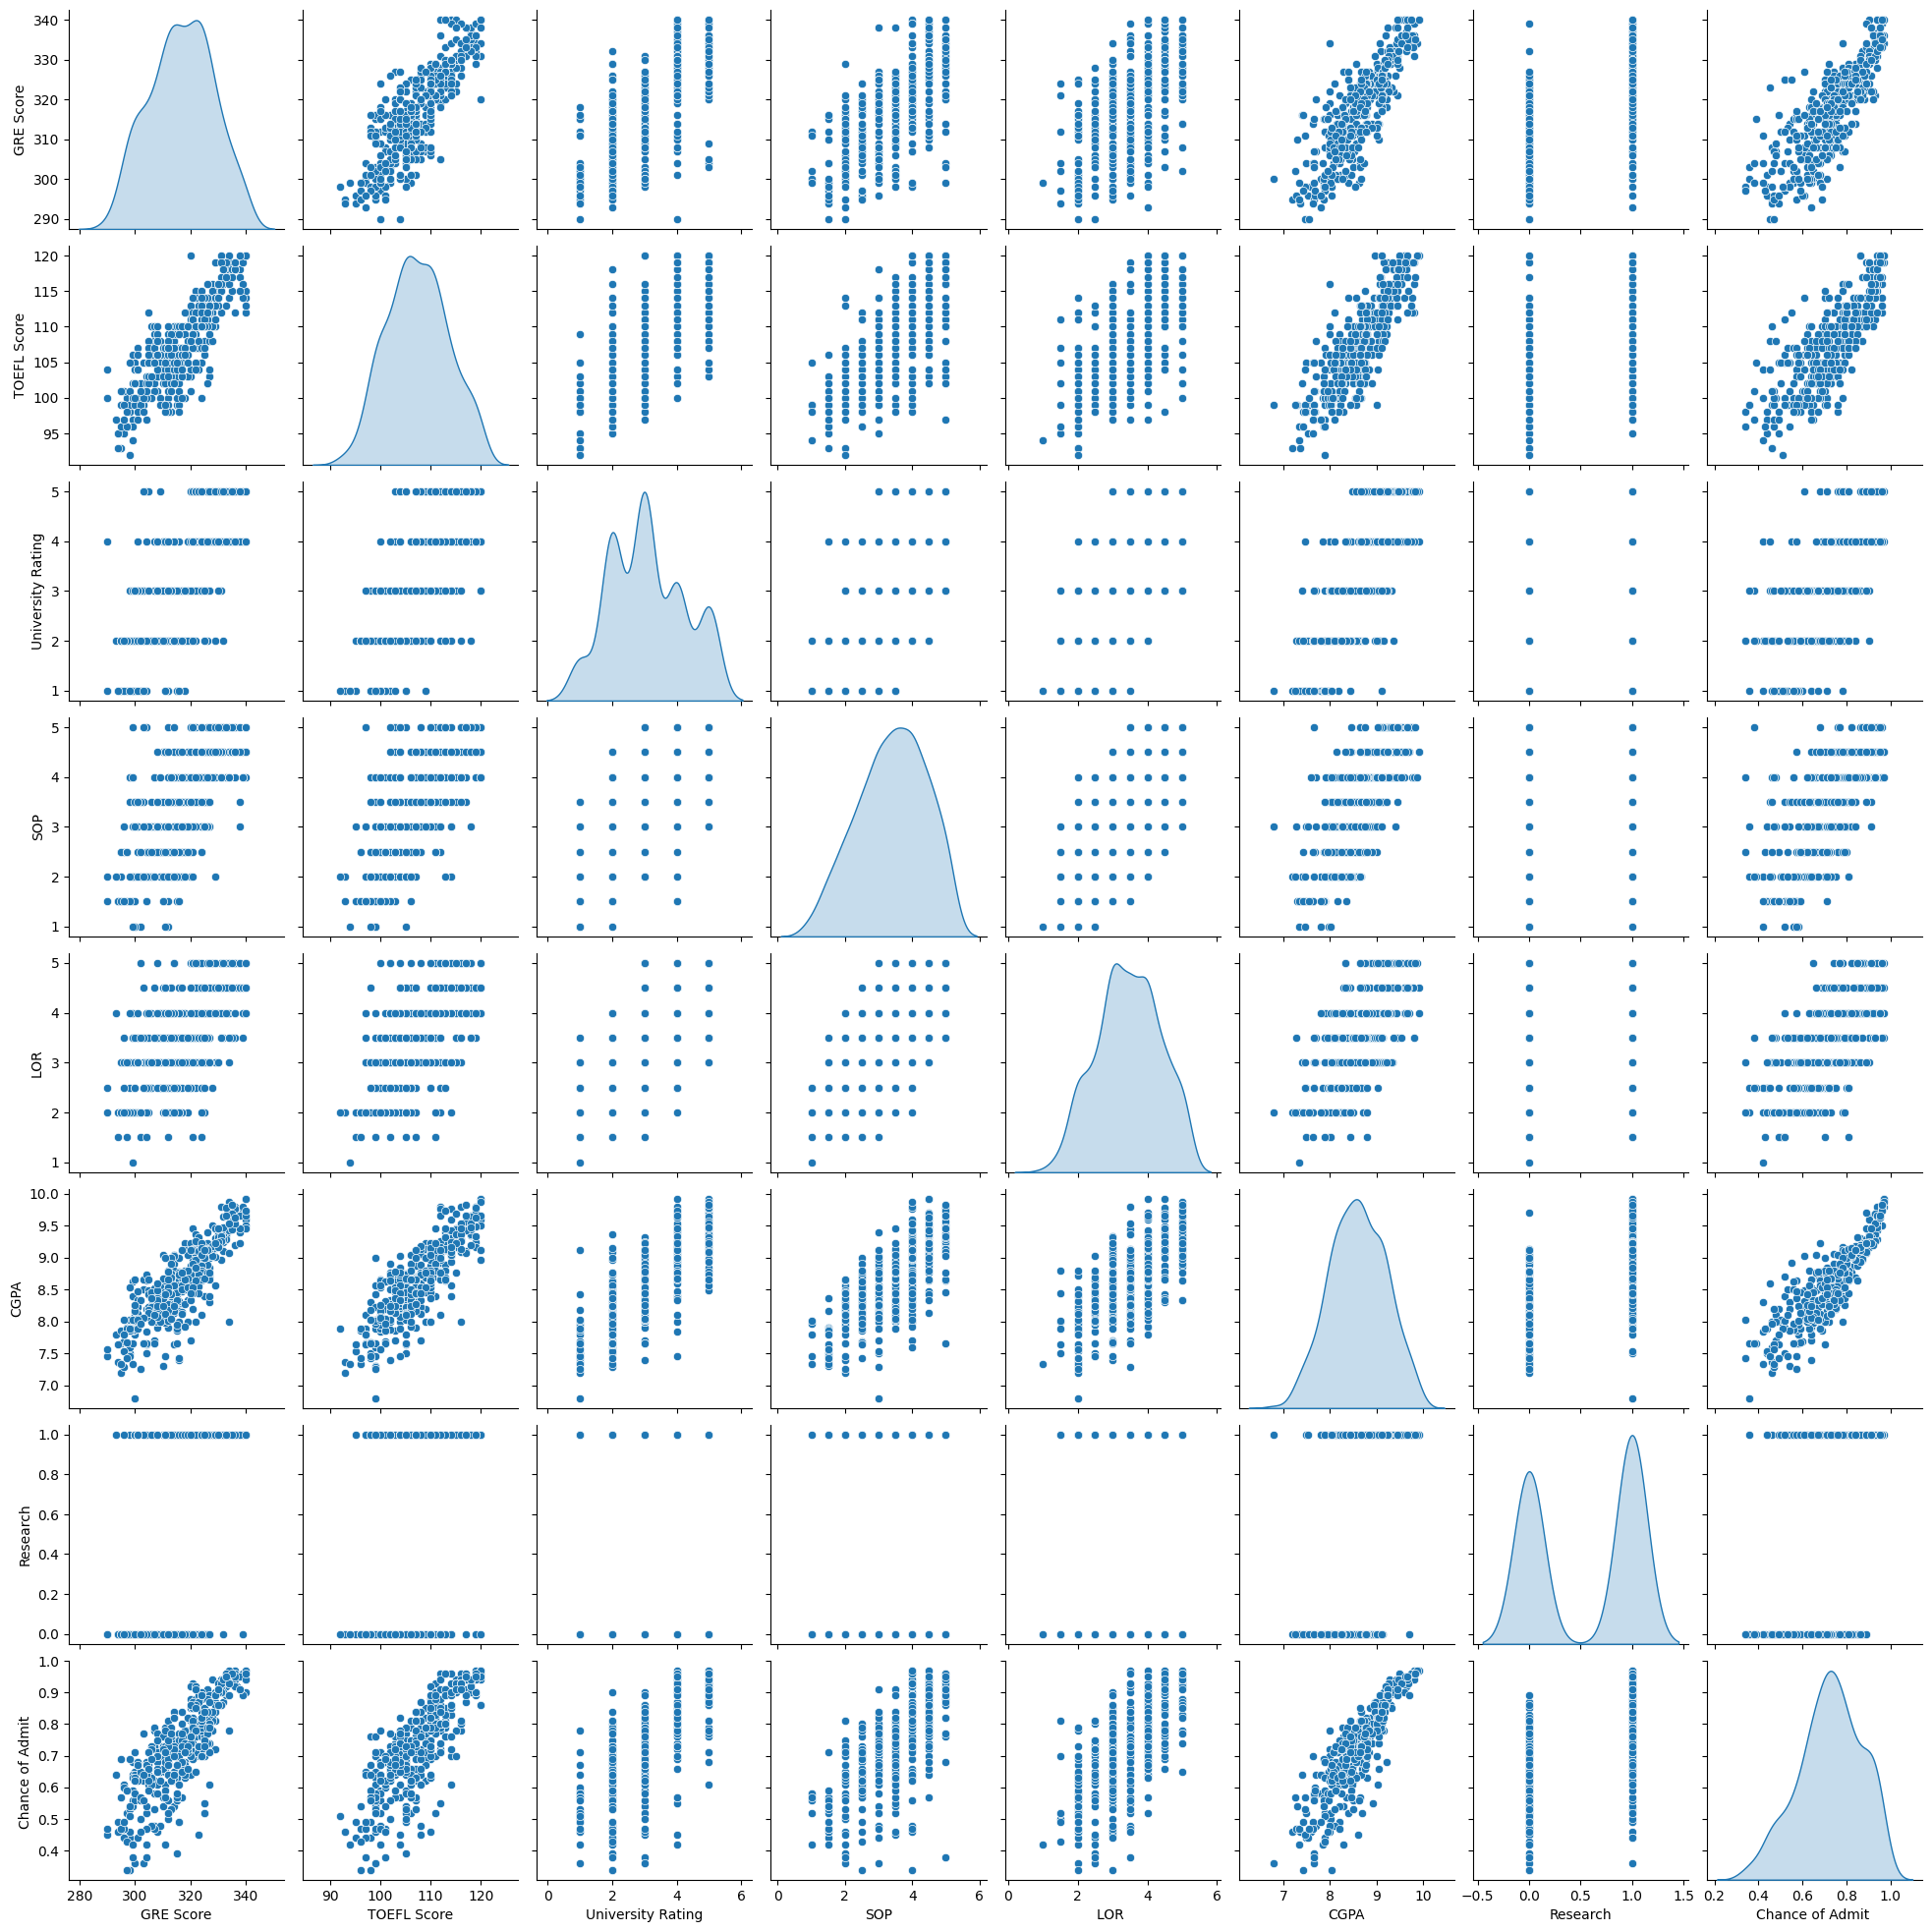

In [9]:
sns.pairplot(admission_df, diag_kind="kde")

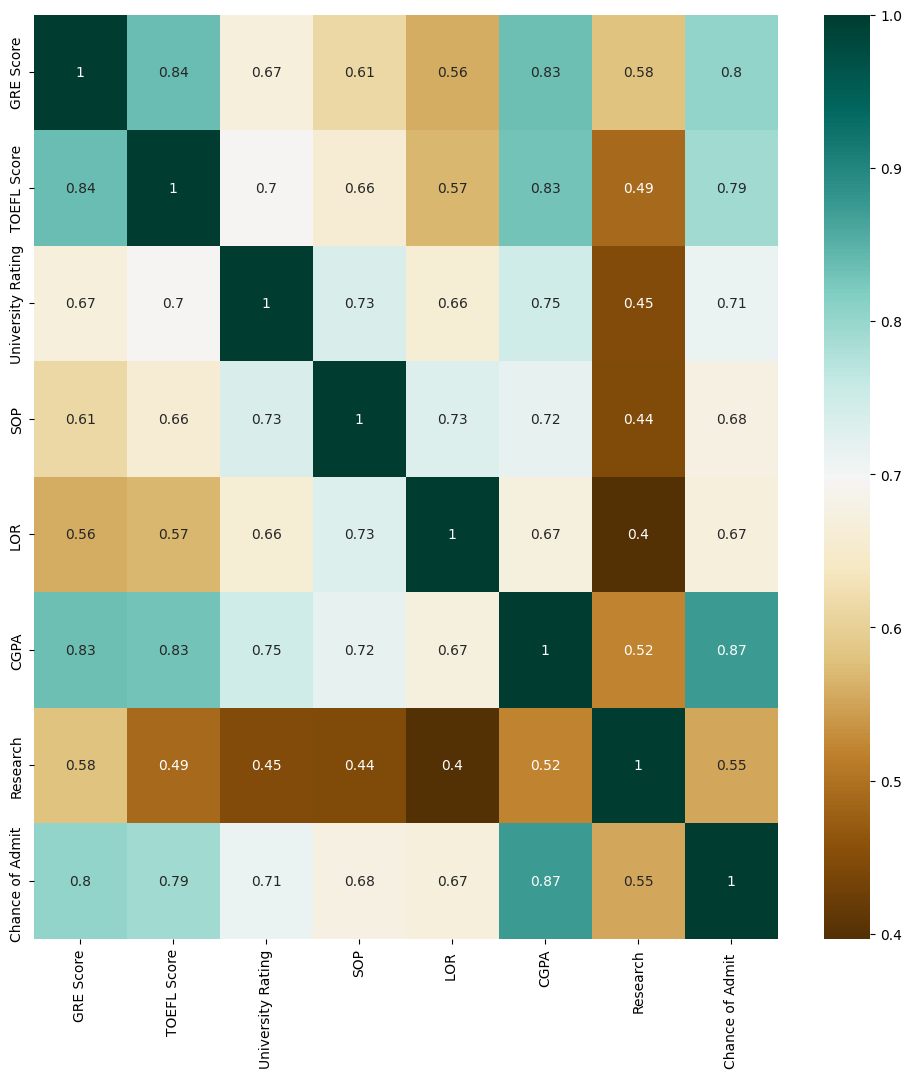

In [10]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True, cmap= "BrBG")
plt.show()

Creating Training and Testing Datasets

In [11]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [12]:
X = admission_df.drop(columns =['Chance of Admit '])
y = admission_df['Chance of Admit ']

In [13]:
X = np.array(X)
y = np.array(y)

In [14]:
y = y.reshape(-1,1)
y.shape

(400, 1)

Scaling Data

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15,random_state=42)

Decision Tree

In [22]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

## Accuracy
DecisionTree_accuracy = DecisionTree_model.score(X_test, y_test)
print("Decision Tree model accuracy: {:.2f} %".format(DecisionTree_accuracy*100))

Decision Tree model accuracy: 61.75 %


Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor()
RandomForest_model.fit(X_train, y_train)

## Accuracy
RandomForest_accuracy = RandomForest_model.score(X_test, y_test)
print("Random Forest model accuracy: {:.2f} %".format(RandomForest_accuracy*100))

C:\Users\KeshavG\AppData\Local\Temp\ipykernel_19076\855598693.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForest_model.fit(X_train, y_train)


Random Forest model accuracy: 80.95 %


Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

## Accuracy
LinearRegression_accuracy = LinearRegression_model.score(X_test, y_test)
print("Linear Regression model accuracy: {:.2f} %".format(LinearRegression_accuracy*100))

Linear Regression model accuracy: 81.03 %


In [25]:
dict = {DecisionTree_accuracy : 'Decision Tree', RandomForest_accuracy : 'Random Forest', LinearRegression_accuracy : 'Linear Regression'}
print('The model with highest accuarcy is:',dict.get(max(dict)))

The model with highest accuarcy is: Linear Regression


Regression Model KPIs

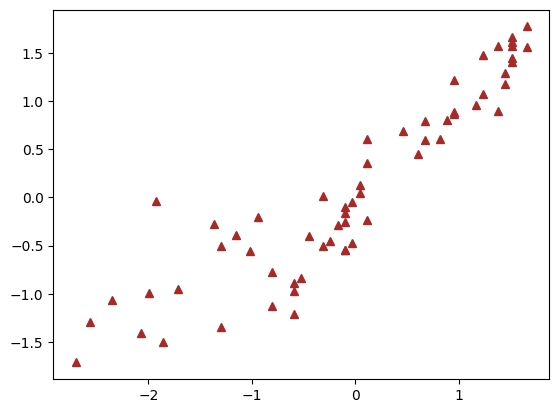

In [29]:
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'brown')

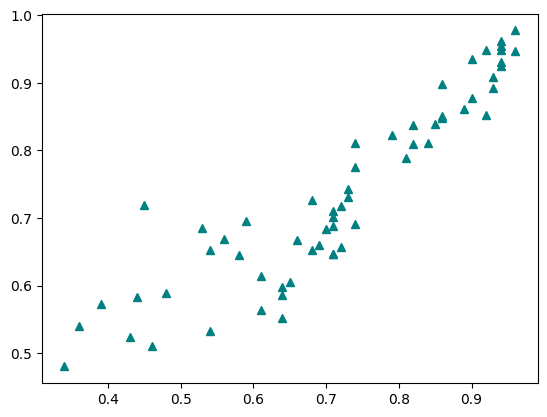

In [32]:
y_predict_orig = scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)
plt.plot(y_test_orig, y_predict_orig, '^', color = 'teal')

In [33]:
k = X_test.shape[1]
n = len(X_test)

In [34]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '.3f'))
MSE  = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_R2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE= ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nR2 = ', r2, '\nAdjusted R2 = ', adj_R2)

RMSE=  0.073 
MSE =  0.005396687273316768 
MAE =  0.05074813528312517 
R2 =  0.810283088191072 
Adjusted R2 =  0.7847442731398702


Predicting on New Data

In [35]:
student_1 = np.array([340,120,3,3,3,9.8,1], ndmin=2)
student_2 = np.array([300,100,4,3,3,8.5,1], ndmin=2)
student_3 = np.array([290,100,3,4,4,7,0], ndmin=2)

prediction_1 = LinearRegression_model.predict(student_1)
prediction_2 = LinearRegression_model.predict(student_2)
prediction_3 = LinearRegression_model.predict(student_3)

print ("Possibility for student_1 is: {:.2f} %".format(int(prediction_1)))
print ("Possibility for student_2 is: {:.2f} %".format(int(prediction_2)))
print ("Possibility for student_3 is: {:.2f} %".format(int(prediction_3)))

Possibility for student_1 is: 70.00 %
Possibility for student_2 is: 61.00 %
Possibility for student_3 is: 59.00 %


In [38]:
pickle.dump(LinearRegression_model, open("Linear_Regression.pkl", "wb"))